# <span style="color:green"> Laboratorio di simulazione numerica </span>

### Martina Colombo, 977556


## <span style="color:blue">  Esercitazione 1</span>


In [1]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import itertools
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Mostra/Nascondi celle</a>.''')

#### Introduzione teorica

Con l'aumento della potenza dei computer negli ultimi decenni la comunità scientifica ha cominciato ad utilizzare metodi numerici per simulare vari sistemi con lo scopo di rispondere a domande ad essi legati. Spesso viene utilizzato un approccio di tipo stocastico che tiene conto della complessità del sistema e permette di risolvere problemi deterministici. I metodi stocastici utilizzati prendono il nome di metodi Monte Carlo. I metodi Monte Carlo coinvolgono l'uso di variabili random in problemi che hanno la struttura di un processo stocastico, ovvero un processo la cui evoluzione è data da eventi casuali. Gli eventi casuali vengono rappresentati dal computer tramite dei numeri random che sono generati tramite un algoritmo. Poiché i numeri vengono generati da un algoritmo che è per natura deterministico si ottengono numeri non del tutto casuali ma pseudo-casuali. Esistono vari tipi di algoritmi per la generazione di numeri pseudo-casuali e si basano tutti sull'idea di generare una sequenza di numeri lunga abbastanza da poter essere utilizzata per una simulazione prima che la sequenza stessa si ripeta. Il generatore di numeri casuali più utilizzato è il generatore lineare congruenziale, esso sfrutta la funzione

$$x_{n+1}=(a x_n + c)mod(m)$$

per produrre la sequenza di numeri interi $x_n$ che risulta essere data dal resto della divisione tra $(a x_n + c)$ ed $m$. La sequenza più lunga che può essere generata prima che questa si ripeta ha $m$ elementi, quindi più $m$ è grande più la sequenza è lunga, il valore di $m$ ha però un limite superiore che corrisponde al numero più alto che il computer è in grado di immagazzinare in una variabile intera, per un computer a 64 bit questo corrisponde a $2^{64}$. Per ricavare una sequenza di numeri pseudo-casuali in $[0,1)$ è sufficiente dividere i numeri interi $x_n$ per il numero $m$. Una volta ottenuto il metodo per costruire una sequenza di numeri uniformemente distribuiti tra $0$ e $1$ è possibile campionare qualsiasi tipo di variabile casuale distribuita con qualsiasi tipo di distribuzione.

Poichè le sequenze di numeri casuali che vengono generate hanno un certo grado di correlazione è necessario utilizzare il **metodo a blocchi** per il calcolo delle incertezze statistiche. L'idea è quella di sfruttare il Teorema del limite centrale che è basato sull'ipotesi di avere variabili casuali identicamente distribuite e indipendenti. Per ottenere variabili casuali indipendenti partendo da sequenze correlate si considera il fatto che le variabili casuali hanno un certo grado di correlazione che decade nel tempo di utilizzo dell’algoritmo, se dividiamo queste configurazioni in blocchi di lunghezza maggiore del numero di step di correlazione, quando calcoliamo il valor medio di ciascun blocco ci aspettiamo che il valor medio di un blocco sia statisticamente indipendente da tutti gli altri. Il valor medio all’interno del blocco può dunque essere considerato una misura dell’osservabile che si sta considerando, la media delle medie sarà la stima dell’osservabile e le fluttuazioni quadratiche delle medie di blocco contribuiranno al calcolo dell’incertezza statistica. Se vogliamo stimare l'osservabile $A$ tramite una simulazione lunga $M$ step Monte Carlo che faccia uso del metodo a blocchi dividiamo gli $M$ step in $N$ blocchi, ogni blocco sarà lungo quindi $M/N$ step, per ogni blocco calcoliamo la media $A_i$ con $i=1...N$, una volta ottenute le medie si calcolano il quadrato del valor medio di $A$ e il valor medio di $A$ al quadrato tramite
$$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$

la varianza $\sigma^2_A$ è definita come

$$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$

dunque l'incertezza statistica legata all'osservabile $A$ è data da

$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]}  . $$

In [5]:
params = {'font.size':15, 'legend.fontsize': 'large' ,'axes.labelsize': 'x-large','axes.titlesize':'x-large','xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### Esercizio 01.1
- Lo scopo del primo esercizio è quello di testare il generatore di variabili casuali RANNYU dell'università di New York che genera numeri casuali uniformemente distribuiti tra 0 e 1. Per verificare la validità di questo generatore per prima cosa è possibile stimare l'integrale
$\langle r \rangle = \int_0^1 r dr$
che rappresenta il valor medio della variabile casuale $r$. Ci aspettiamo che, se l'algoritmo è efficiente, il valore dell'integrale converga al valore $1/2$ che rappresenta esettamente il valore medio di una distribuzione di numeri casuali uniformemente distribuiti tra $0$ e $1$.
Nel codice viene fatta una simulazione lunga $M=10^4$ step Monte Carlo, l'algoritmo RANNYU viene quindi chiamato $M$ volte così da generare $M$ numeri casuali distribuiti uniformemente tra $0$ e $1$, ogni blocco è lungo $N=10^2$ step. Dopo aver applicato il metodo a blocchi per il calcolo dell'incertezza statistica è possibile plottare il valore $\langle r \rangle$ calcolato in ogni blocco al variare del numero di blocchi $\#_{blocks}=1...N$. Dal seguente grafico vediamo che con l'aumentare del numero di blocchi il valor medio di $r$ si avvicina sempre più al valore atteso $\mu=1/2$, l'incertezza statistica diminuisce con l'aumentare del numero di blocchi fino ad assestarsi ad $1\sigma$ dal valore atteso. 

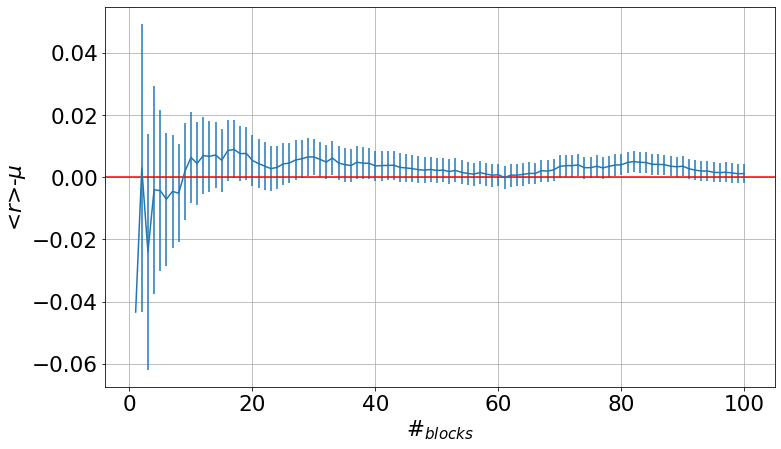

In [18]:
plt.figure(figsize=(12,7))

x, y, error = np.loadtxt("1.1/file.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,y-0.5,yerr=error)
plt.grid()
plt.axhline(y=0, color='red')
plt.xlabel('$\#_{blocks}$')
plt.ylabel('<$r$>-$\mu$')

plt.show()

- Un altro modo per testare la validità dell'algoritmo è quello di calcolare la varianza di $r$. La varianza per una distribuzione di numeri casuali uniformi tra $0$ e $1$ è pari a $1/12$, se il valore che otteniamo si assesta intorno a questo allora il generatore di numeri casuali è efficiente. La varianza è data $\sigma^2 = \int_0^1 (r-1/2)^2 dr$. Utilizzando lo stesso metodo descritto in precedenza per il calcolo di $\langle r\rangle$ possiamo plottare il grafico della varinza in funzione del numero di blocchi. Vediamo che con l'aumentare di $\#_{blocks}$ il valore di $\sigma^2_r$ si avvicina al valore atteso e l'incertezza statistica diminuisce fino ad assestarsi ad un valore compatibile con $\sigma^2$.

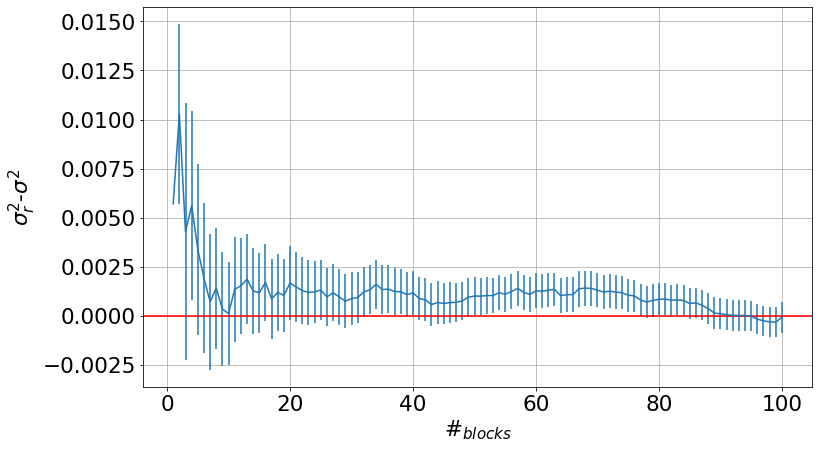

In [19]:
plt.figure(figsize=(12,7))

x, y, error = np.loadtxt("1.1/file.dat", usecols=(0,3,4), delimiter=' ', unpack='true')
plt.errorbar(x,y-1/12,yerr=error)
plt.grid()
plt.axhline(y=0, color='red')
plt.xlabel('$\#_{blocks}$')
plt.ylabel('$\sigma^2_r$-$\sigma^2$')

plt.show()

- L'ultimo metodo che utilizziamo per testare l'efficienza del generatore è quello del chi quadro. Il test del chi quadro è una misura dell'errore tra le osservazioni $O_i$e i valori attesi $E_i$ ed è definito come $\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$. Se dividiamo l'intervallo $[0,1]$ in $M$ sottointervalli identici abbiamo che il valore atteso è ricavato tramite la binomiale infatti la probabilità di ottenere $k$ successi ognuno con probabilità $p$ in $n$ tentativi è distribuita secondo questa distribuzione, il suo valor medio è dato da $np$ e la varianza è data da $np(1-p)$, ma se $p$ è piccolo la varianza è approssibabile con $np$ (questo è il motivo per chi a denominatore troviamo il valore atteso). Dunque se la probabilità per ogni sotto intervallo è $1/M$ con $M=10^2$e si campionano $n=10^4$ numeri casuali, il valore atteso è $n/M$ e il chi quadro diventa $$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}.$$
Operativamente dopo aver diviso l'intervallo $[0,1]$ in $M$ sottointervalli generiamo $n=10^4$ numeri casuali e registriamo ogni volta in un istogramma a quale sottointervallo appartengono incrementando un contatore, una volta finita questa procedura calcoliamo il valore di chi quadro. Ripetiamo questo calcolo per $\#_{tries}=10^2$ volte e plottiamo i valori di $\chi^2$. Ci aspettiamo che $(n_i - n/M)^2 \simeq n/M$ e quindi che $\chi^2 \simeq 100$. Dal grafico vediamo che le fluttuazioni intorno al valore atteso di $\chi^2$ sono abbastanza grandi, questo risultato è un primo segnale che ci avverte del fatto che come detto in precedenza i generatori di numeri random generano in realtà dei numeri pseudo casuali e non puramente casuali.


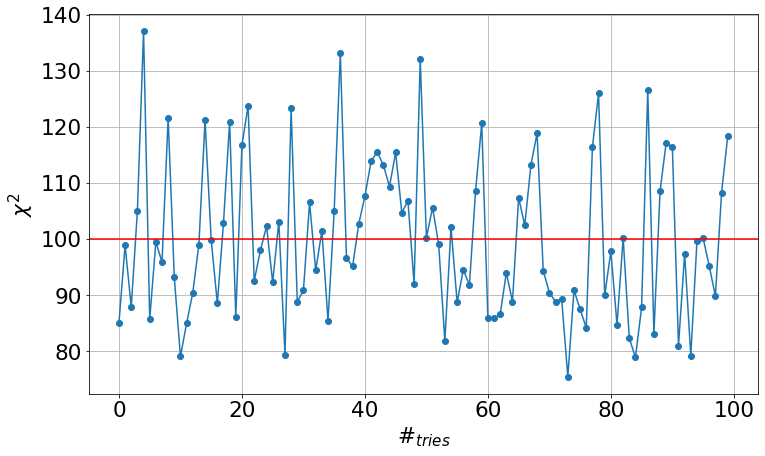

In [20]:
plt.figure(figsize=(12,7))

x, y = np.loadtxt("1.1/chi_square.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x, y, '-o')
plt.axhline(y=100, color='red')
plt.grid()
plt.xlabel('$\#_{tries}$')
plt.ylabel('$\chi^2$')
plt.show()

### Esercizio 01.2
- In questo secondo esercizio verifichiamo il Teorema del limite centrale (TLC) e  le sue estensioni. Date $N$ variabili random statisticamente indipendenti e uniformemnte distribuite $x_i$ con media $\mu$ e varianza $\sigma^2$ finita si ha che secondo il TLC la somma delle $N$ variabili definita come $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ è distribuita secondo una Gaussiana con media pari a $\mu$ e varianza pari a $\sigma^2$. Per verificare questo teorema aggiungiamo al file random.cpp la distribuzione esponenziale $p(x) = \lambda \exp(-\lambda x)$ con $x\in [0;+\infty]$ e la distribuzione di Cauchy-Lorentz $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$ con $x\in [-\infty;+\infty]$ usando il metodo dell'inversione della cumulata. Secondo questo metodo data una variabile random $x$ con distibuzione di probabilità $p(x)$ e distribuzione cumulata $F(x)$ si dimostra che la distribuzione $p(y)$ con $y=F(x)$ è pari a $1$ e $0\leq y\leq 1$, dunque se è nota la distribuzione cumulata $F(x)$ ed è invertibile, campionando la variabile $y$ uniformemente distribuita tra $0$ e $1$ è possibile ricavare $x$ tramite $x=F^{-1}(y)$. Ad esempio nel caso della distribuzione esponenziale abbiamo $$F(x)= \int_{0}^{x} {\lambda \exp(-\lambda x)} {dx}=1-e^{-x\lambda}\,\,\,\longrightarrow\,\,\,\,\, x=F^{-1}(y)=-\frac{1}{\lambda} \log(1-x).$$ Questa proprietà ha implicazioni importanti per il campionamento di qualsiasi distribuzione di probabilità. $\newline$ Per verificare il teorema consideriamo inizialmente il sampling di una distribuzione uniforme, creiamo un istogramma contenente $10^4$ realizzazioni di $S_N$ facendo variare di volta in volta il numero $N$ di addendi ($N=1, 2, 10, 100$), dal grafico vediamo che per $N=1$ otteniamo la distribuzione uniforme, aumentando $N$ la distribuzione assume una forma Gaussiana la cui media corrisponde ad $1/2$ che è il valor medio atteso da una distribuzione uniforme tra $0$ e $1$. La linea nera tratteggiata evidenzia un fit normale dei dati per $N=100$ da cui otteniamo $\mu = 0.5$ e $\sigma=0.028$.

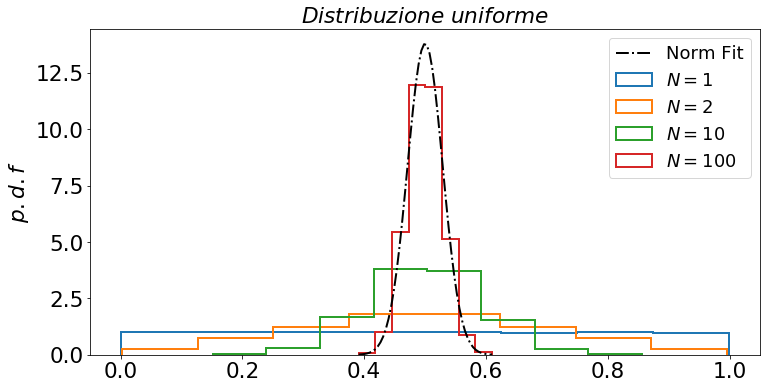

Parametri del Fit: 
Mu =  0.5000180022
Std =  0.02891137903400312


In [21]:
plt.figure(figsize=(12,6))
x, y, z, w = np.loadtxt("1.2/flat.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')


xmin=np.min(w)
xmax=np.max(w)
data = np.linspace(xmin,xmax)
plt.hist(x, bins=8, label='$N=1$', histtype='step', linewidth=2, density=True)
plt.hist(y, bins=8, label='$N=2$', histtype='step',linewidth=2, density=True)
plt.hist(z, bins=8, label='$N=10$', histtype='step', linewidth=2, density=True)
plt.hist(w, bins=8, label='$N=100$', histtype='step', linewidth=2, density=True)
plt.ylabel('$p.d.f$')
#Fit normale
mu, std=stats.norm.fit(w)
w_fit=stats.norm.pdf(data, mu, std)
plt.plot(data, w_fit, linewidth=2, color='black', linestyle='dashdot', label='Norm Fit')
plt.legend(loc='best')
plt.title('$Distribuzione$ $uniforme$')

plt.show()
print('Parametri del Fit: ')
print('Mu = ',  mu)
print('Std = ', std)

Consideriamo ora il sampling di una distribuzione esponenziale con $\lambda =1$, dal grafico vediamo che anche in questo caso per $N=1$ ritroviamo la distribuzione esponenziale, man mano che $N$ aumenta otteniamo il profilo di una Gaussiana con media $\mu=1$ e deviazione standard $\sigma=0.98$.

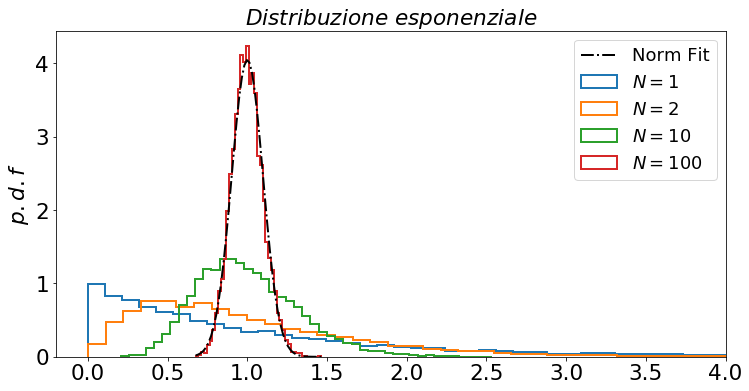

Parametri del Fit: 
Mu =  1.0005304437
Std =  0.09862300935707058


In [22]:
plt.figure(figsize=(12,6))


x, y, z, w = np.loadtxt("1.2/exp.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')

xmin=np.min(w)
xmax=np.max(w)
data = np.linspace(xmin,xmax)
plt.hist(x, bins=85, label='$N=1$', histtype='step', linewidth=2, density=True)
plt.hist(y, bins=45, label='$N=2$', histtype='step',linewidth=2, density=True)
plt.hist(z, bins=45, label='$N=10$', histtype='step', linewidth=2, density=True)
plt.hist(w, bins=45, label='$N=100$', histtype='step', linewidth=2, density=True)
plt.xlim(-0.2,4)
plt.ylabel('$p.d.f$')
#Fit normale
mu, std=stats.norm.fit(w)
w_fit=stats.norm.pdf(data, mu, std)
plt.plot(data, w_fit, linewidth=2, color='black', linestyle='dashdot', label='Norm Fit')
plt.legend(loc='best')
plt.title('$Distribuzione$ $esponenziale$')

plt.show()
print('Parametri del Fit: ')
print('Mu = ',  mu)
print('Std = ', std)

Come ultimo caso consideriamo il sampling di una distribuzione di Cauchy Lorentz con $\mu=0$ e $\Gamma=1$, questo tipo di distribuzione non rispetta il TLC perché non ha varianza finita, di conseguenza si ha che all'aumentare di $N$ la forma della distribuzione non è una Gaussiana ma continua ad essere una distribuzione di Cauchy Lorentz come si può vedere dal grafico e dal fit da cui ricaviamo i parametri $\mu=0.002$ e $\Gamma = 0.991$.

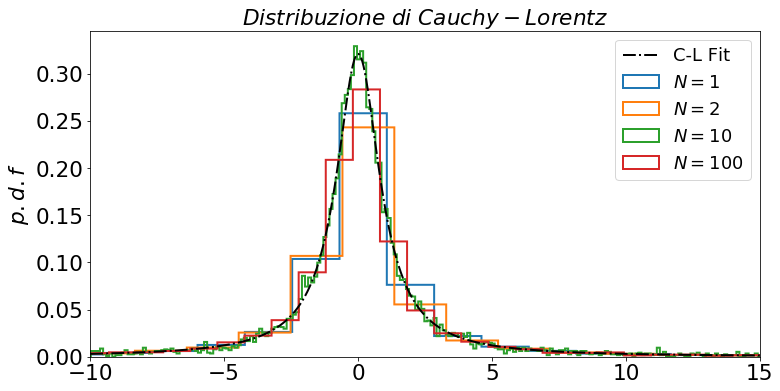

Parametri del Fit: 
Mu =  0.002016215928899528
Gamma =  0.9916838382842189


In [23]:
plt.figure(figsize=(12,6))

x, y, z, w = np.loadtxt("1.2/lorentz.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')

plt.hist(x, bins=80000, label='$N=1$', histtype='step', linewidth=2, density=True)
plt.hist(y, bins=20000, label='$N=2$', histtype='step',linewidth=2, density=True)
plt.hist(z, bins=20000, label='$N=10$', histtype='step', linewidth=2, density=True)
plt.hist(w, bins=20000, label='$N=100$', histtype='step', linewidth=2, density=True)
plt.xlim(-10,15)
plt.ylabel('$p.d.f$')
plt.title('$Distribuzione$ $di$ $Cauchy-Lorentz$')
#Fit di Cauchy Lorentz
xt=plt.xticks()[0]
xmin=min(xt)
xmax=max(xt)
data = np.linspace(xmin,xmax,10000)
mu, gamma = stats.cauchy.fit(w)
w_fit=stats.cauchy.pdf(data, mu, gamma)
plt.plot(data, w_fit, linewidth=2, color='black', linestyle='dashdot', label='C-L Fit')
plt.legend(loc='best')

plt.show()
print('Parametri del Fit: ')
print('Mu = ',  mu)
print('Gamma = ', gamma)

### Esercizio 01.3
- Nell'ultimo esercizio simuliamo l'esperimento di Buffon. In questo esperimento viene lanciato più volte in modo casuale un ago di lunghezza $l$ su un piano orizzontale su cui sono disegnate delle linee parallele equispaziate a distanza $d$ con $d > l$. La probabilità che l'ago intersechi una linea è pari a $P = 2l/\pi d$. Questo risultato può essere utilizzato per stimare $\pi$ infatti se lanciamo l'ago un numero $N_{thr}$ di volte e contiamo il numero di volte $N_{hit}$ in cui l'ago ha intersecato una riga si ha che $\pi$ può essere ricavato tramite 
$$\pi = \frac{2l}{Pd} = \lim_{N_{thr} \to \infty}\frac{2lN_{thr}}{N_{hit}d}  .$$  Per prima cosa è necessario trovare la condizione tramite cui è possibile stabilire se l'ago interseca oppure no le linee del piano orizzontale. Consideriamo quindi un ago in posizione generica come in figura, tracciamo il segmento $x$ che rappresenta la distanza tra il punto medio dell'ago e la linea, consideriamo poi l'angolo $\theta$ formato dalla linea orizzontale e il prolungamento dell'ago. Collegando la fine dell'ago e la distanza $x$ tramite un segmento perpendicolare si ha che l'ago interseca la linea orizzontale solo quando la quantità $l/2 sen(\theta)$ è maggiore di $x$.

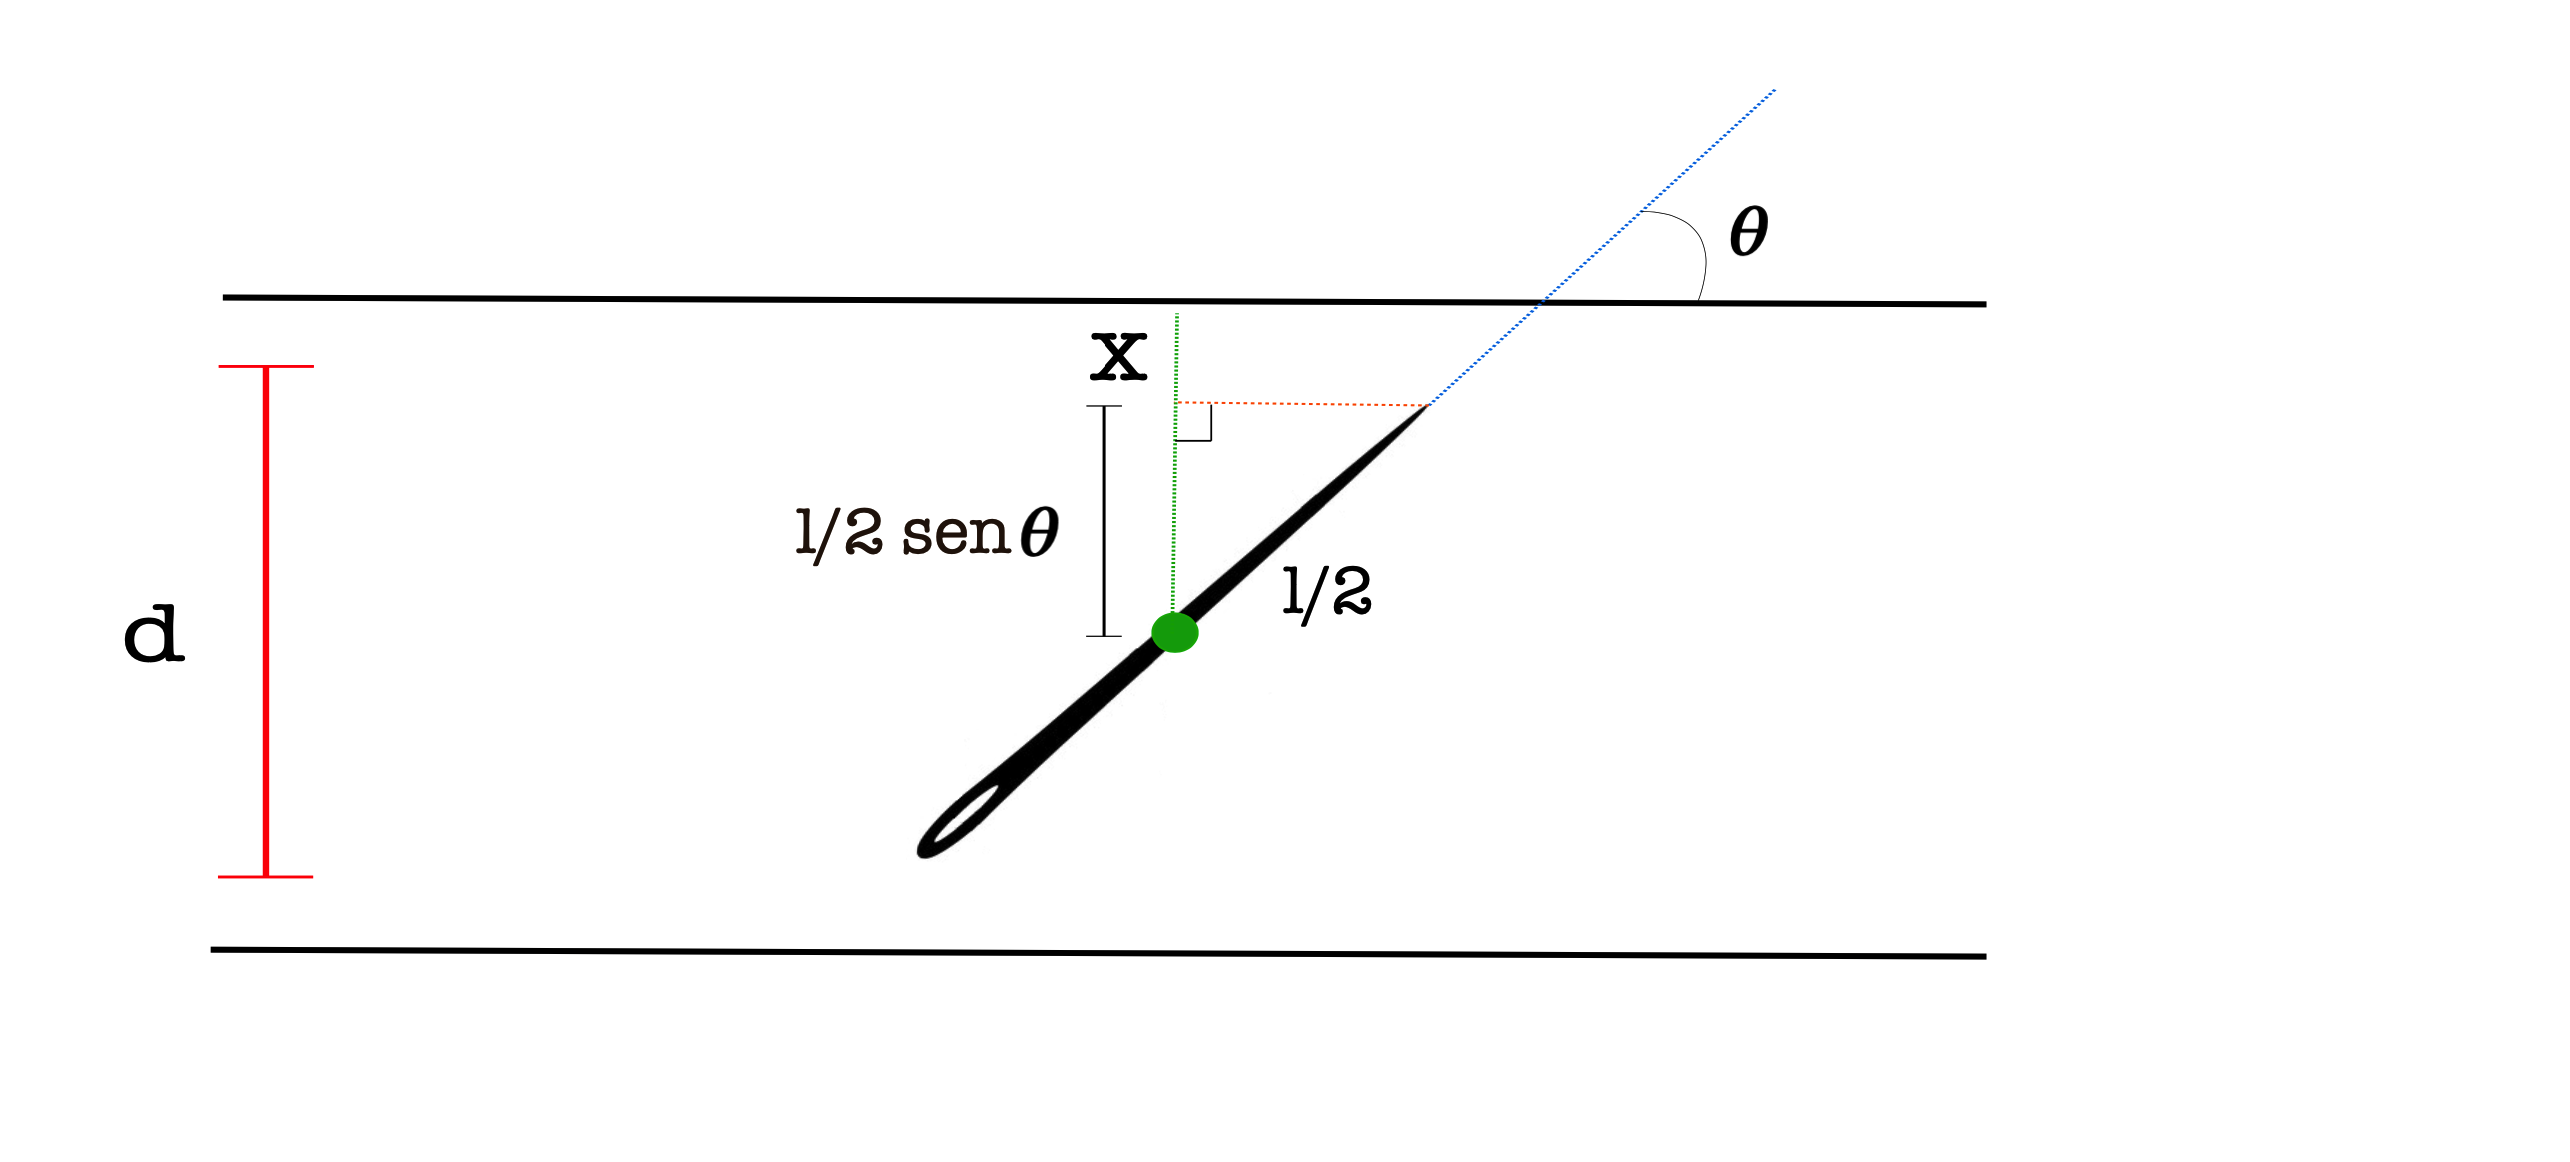

Da un punto di vista operativo sempre utilizzando il metodo a blocchi consideriamo $M=10^5$ step Monte Carlo divisi in $N=10^2$ blocchi, per ogni blocco generiamo $L=M/N$ numeri casuali tra $0$ e $d/2$ che rappresentano la distanza $x$, per generare $L$ valori casuali di $\theta$ utilizziamo un metodo in cui non è necessario utilizzare $\pi$. Generiamo due numeri casuali $y$ e $z$ tra $0$ e $1$, se $y^2+z^2<1$, quindi se il punto $(x,y)$ è contenuto nella circonferenza unitaria, calcoliamo $\theta$ come $\theta=acos(\frac{y}{\sqrt{y^2+z^2}})$ valutiamo poi la condizione $l/2 sen(\theta)$, se $x$ è minore di questo valore allora l'ago interseca la linea orizzontale e incrementiamo il contatore $N_{hit}$. Valutiamo infine $\pi$ come $\pi=\frac{2lN_{thr}}{N_{hit}d}.$ Di seguito è riportato il grafico del valore di $\pi$ calcolato con il metodo a blocchi, vediamo come con l'aumentare del numero di blocchi l'incertezza diminuisce e il valore medio si avvicina al valore atteso.

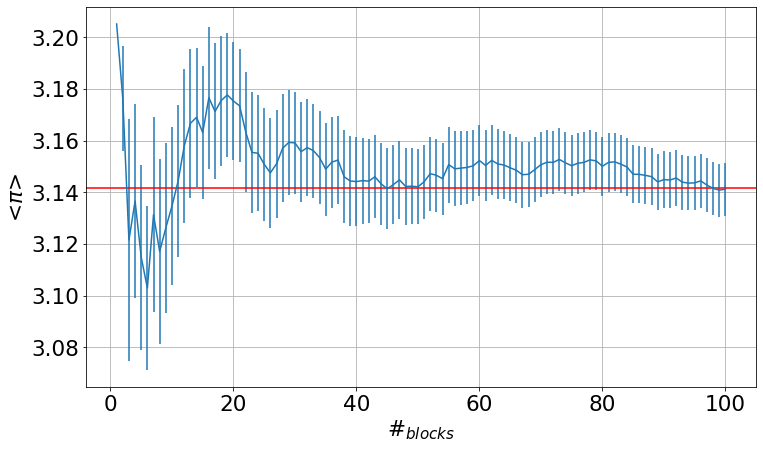

In [24]:
plt.figure(figsize=(12,7))

x, y, error = np.loadtxt("1.3/pi.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,y,yerr=error)
plt.axhline(y=math.pi, color='red')
plt.xlabel('$\#_{blocks}$')
plt.ylabel('<$\pi$>')
plt.grid()

plt.show()